In [9]:
import numpy as np
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px


In [17]:
%%capture
rlnc = BlockBasedRLNC(field_order=2**8, generation_size=16,
                      packet_size=16, total_size=1024*64,
                      initial_redundancy=1, initial_window_size=1, exponential_loss_param=0.045);

analytics_result = rlnc.run_simulation()

In [18]:
df = analytics_result.get_analytics_data_frame()
df

,time,type,redundancy,window size,generation window,average needed packets,generation size,loss rate,new coded packets count,extra packets count,received packets,effective packets,linearly dependent packets,redundant packets
0,1,send,1.0,1.0,[0],NaN,None,0.007,17.0,0.0,NaN,NaN,NaN,NaN
1,2,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,16.0,16.0,0.0,0.0
2,3,feedback,NaN,NaN,None,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,send,1.0,2.0,"[1, 2]",NaN,None,0.019,34.0,0.0,NaN,NaN,NaN,NaN
4,5,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,33.0,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,63.0,58.0,0.0,5.0
194,195,feedback,NaN,NaN,None,-1.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,196,send,2.0,3.0,"[253, 254, 255]",NaN,None,0.047,54.0,2.0,NaN,NaN,NaN,NaN
196,197,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,53.0,50.0,0.0,3.0


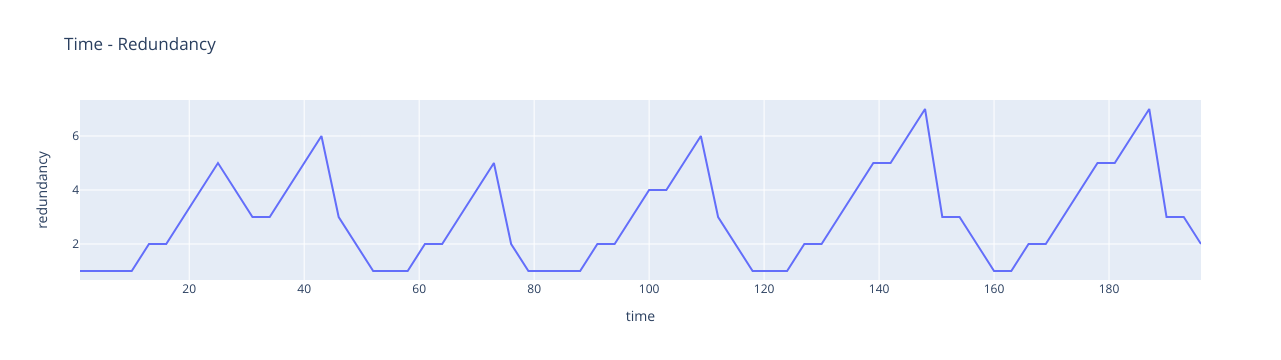

In [19]:
fig = px.line(df.query("type=='send'"), x="time", y="redundancy", title='Time - Redundancy')
fig.show()

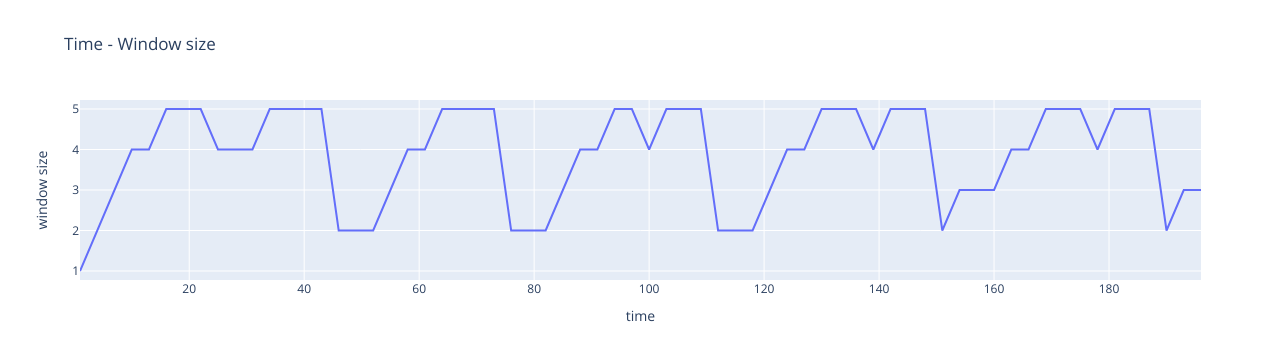

In [20]:
fig = px.line(df.query("type=='send'"), x="time", y="window size", title='Time - Window size')
fig.show()

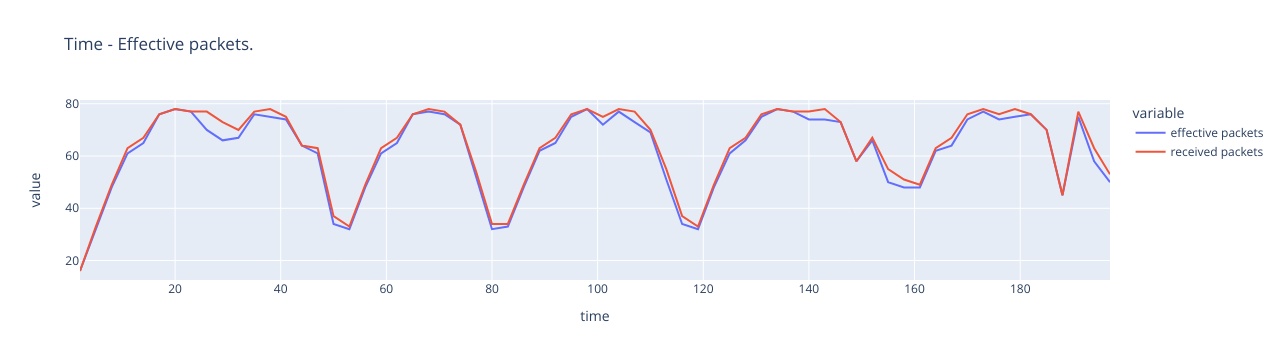

In [21]:
fig = px.line(df.query("type=='receive'"), x="time", y=["effective packets","received packets"],title='Time - Effective packets.')
fig.show()

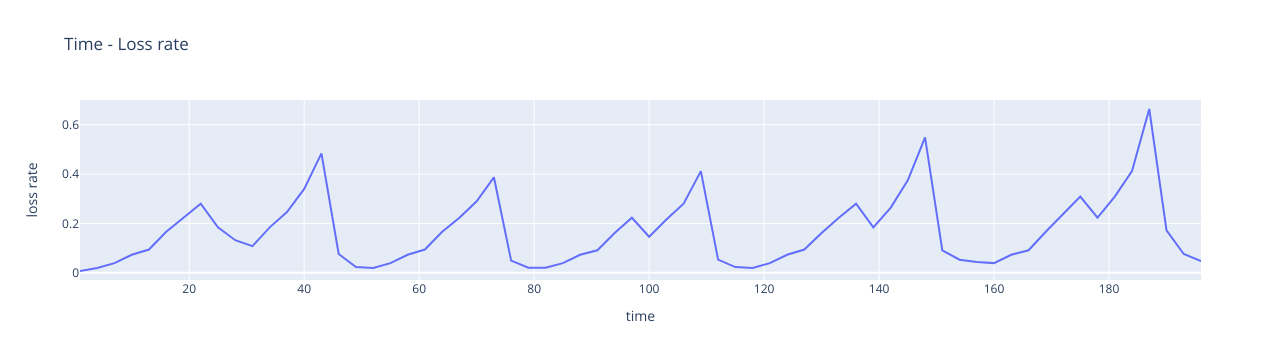

In [22]:
fig = px.line(df.query("type=='send'"), x="time", y="loss rate", title='Time - Loss rate')
fig.show()

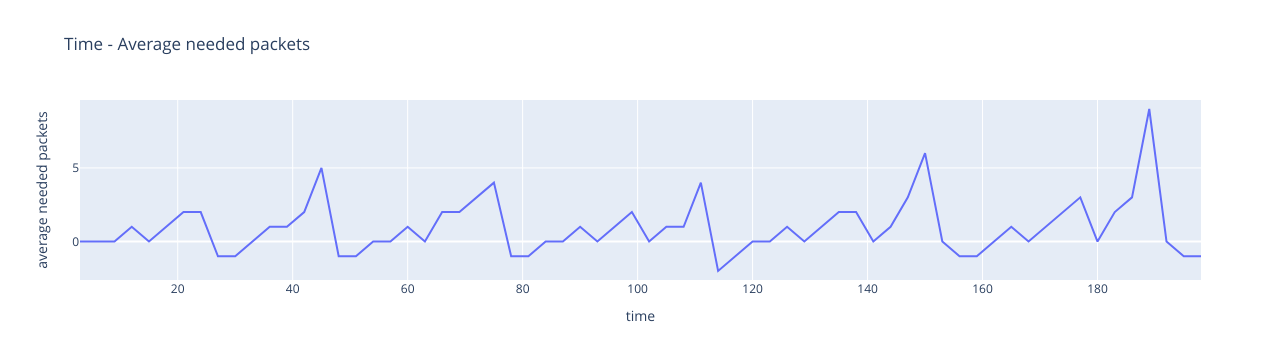

In [23]:
fig = px.line(df.query("type=='feedback'"), x="time", y="average needed packets", title='Time - Average needed packets')
fig.show()